In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  # data visualisation
import seaborn as sns #data visualization

In [ ]:
data = pd.read_csv('/content/insurance.csv', skiprows=4)
data.head

<bound method NDFrame.head of      Y = total payment for all the claims in thousands of Swedish Kronor
108                                              392.5                  
19                                                46.2                  
13                                                15.7                  
124                                              422.2                  
40                                               119.4                  
..                                                 ...                  
9                                                 87.4                  
31                                               209.8                  
14                                                95.5                  
53                                               244.6                  
26                                               187.5                  

[63 rows x 1 columns]>

In [ ]:
data.describe()

Payments      Claims
count   63.000000   63.000000
mean    98.187302   22.904762
std     87.327553   23.351946
min      0.000000    0.000000
25%     38.850000    7.500000
50%     73.400000   14.000000
75%    140.000000   29.000000
max    422.200000  124.000000

In [ ]:
data.rename(columns={'Y = total payment for all the claims in thousands of Swedish Kronor': 'Payments'}, inplace=True)
data.head()

Payments
108     392.5
19       46.2
13       15.7
124     422.2
40      119.4

In [ ]:
data['Claims'] = data.index
data.head()


Payments  Claims
108     392.5     108
19       46.2      19
13       15.7      13
124     422.2     124
40      119.4      40

In [ ]:
data.reset_index(drop=True, inplace=True)
data.head()

Payments  Claims
0     392.5     108
1      46.2      19
2      15.7      13
3     422.2     124
4     119.4      40

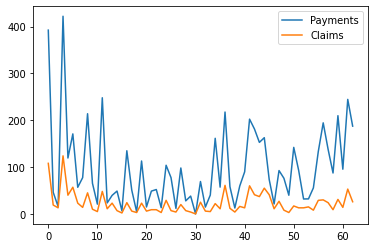

In [ ]:
data.plot()

Text(0, 0.5, 'cClaims')

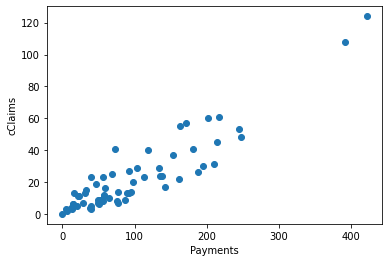

In [ ]:
plt.scatter(x=data['Payments'],y=data['Claims'])
plt.xlabel("Payments")
plt.ylabel("cClaims")

In [ ]:
x=data['Payments']
y=data['Claims']

Text(0, 0.5, 'payments')

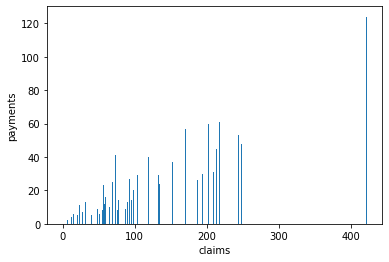

In [ ]:
plt.bar(x,y)
plt.xlabel("claims")
plt.ylabel("payments")

In [ ]:
correlation = data['Payments'].corr(data['Claims'])
correlation

0.9128782350234074

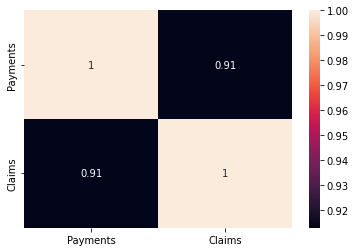

In [ ]:
sns.heatmap(data.corr(), annot = True)

Linear Regression


In [ ]:
 from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [ ]:
x=data['Claims'].values
y=data['Payments'].values
x = x.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.8950819493918402

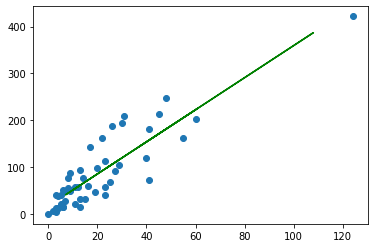

In [ ]:
y_predicts = reg.predict(x_test)
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, y_predicts, color="green")

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
model = Lasso() 
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8950801986164431

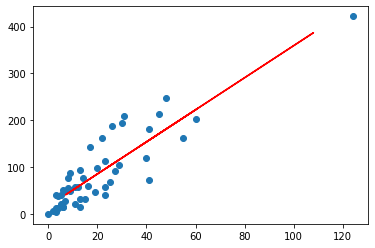

In [ ]:
y_predict = model.predict(x_test)
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, y_predict, color="red")

Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(n_estimators=100,n_jobs=1)
reg2.fit(x_train,y_train)
reg2.score(x_test,y_test)

0.8165388115065821

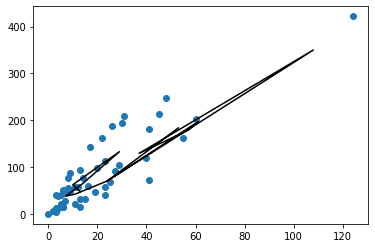

In [ ]:

y_pred = reg2.predict(x_test)
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, y_pred, color="black")